# Import necessary library

In [1]:
import numpy as np
import pandas as pd
import nltk
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
import pickle

Using TensorFlow backend.


In [2]:
emails=pd.read_csv("endava_email_tickets_ML.csv")

In [3]:
regexList = [
'From:(.*)\r\n',
'^[_a-z0-9-]+(\\.[_a-z0-9-]+)*@[a-z0-9-]+(\\.[a-z0-9-]+)*(\\.[a-z]{2,4})$',
'[\\w\\d\\-\\_\\.]+ @ [\\w\\d\\-\\_\\.]+',
'Subject:',
'[^a-zA-Z]']
emails['body'] = emails['body'].replace(regexList, ' ')

In [4]:
#stop_words = set(stopwords.words('english')) 

In [17]:
#stop_words

In [21]:
#emails['body'].apply(lambda x: [item for item in x if item not in stop_words])

In [4]:
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}

In [5]:
def clean_text(text):    
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text
X_body = emails['body'].apply(lambda p: clean_text(p))

In [9]:
max_phrase_len = X_body.apply(lambda p: len(p.split(' '))).max()

In [8]:
Y_ctg = emails['category']

In [10]:
max_words = 10000
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~')
tokenizer.fit_on_texts(X_body)
X = tokenizer.texts_to_sequences(X_body)
X = pad_sequences(X, maxlen = max_phrase_len)
Y = to_categorical(Y_ctg)

In [12]:
max_phrase_len

980

In [13]:
emails['category'].value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64

In [17]:
Y.shape

(48549, 13)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [13]:
model_lstm_category = Sequential()
model_lstm_category.add(Embedding(10000, 128, input_length = max_phrase_len))
model_lstm_category.add(SpatialDropout1D(0.3))
model_lstm_category.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm_category.add(Dense(13, activation = 'softmax'))
model_lstm_category.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

W1210 22:20:35.710259  7144 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1210 22:20:36.494213  7144 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1210 22:20:36.611046  7144 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1210 22:20:36.797937  7144 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1210 22:20:36.836186  7144 deprecation.py:506

In [14]:
history = model_lstm_category.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    epochs = 2,
    batch_size = 128)

W1210 22:20:46.981367  7144 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 23788 samples, validate on 10196 samples
Epoch 1/2
23788/23788 [==============================] - 3056s 128ms/step - loss: 0.9713 - acc: 0.7173 - val_loss: 0.7901 - val_acc: 0.7628
Epoch 2/2
23788/23788 [==============================] - 3353s 141ms/step - loss: 0.6572 - acc: 0.8035 - val_loss: 0.6394 - val_acc: 0.8054


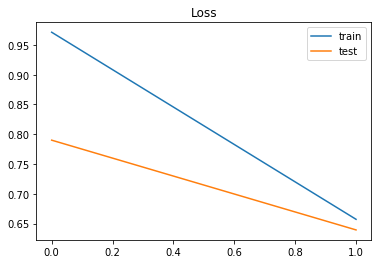

In [15]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

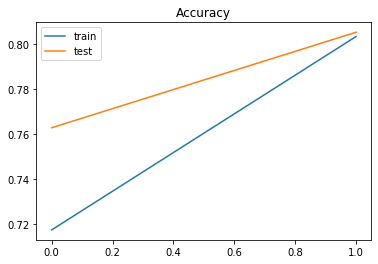

In [16]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [17]:
pickle.dump(model_lstm_category, open('model_category.pkl','wb'))

In [18]:
test=['icon dear please setup icon per icon engineers please let other details needed thanks lead']

In [19]:
test_tokens = tokenizer.texts_to_sequences(test)
test_sequence = pad_sequences(test_tokens, maxlen = max_phrase_len)

In [20]:
model = pickle.load(open('model_category.pkl','rb'))
print(np.argmax(model.predict(test_sequence)))

4
